### Keras implementation of Brain CNN

In [1]:
import tensorflow as tf
import numpy as np
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
IMG_WIDTH = 64
IMG_HEIGHT = 64
SNAPS = 8 ##Number of snaps over 4 seconds
STRIP_DEPTH = 8
# STRIP_WIDTH = IMG_WIDTH * SNAPS
# STRIP_HEIGHT = IMG_HEIGHT * STRIP_DEPTH
SLICE = 1
CHANNELS = 1
CLASSES = 2
conv1_filter = 4
conv2_filter = 8
conv3_filter = 8
conv4_filter = 16
conv5_filter = 4
conv6_filter = 4

In [3]:
experiment = 's8snap'
path = '/work/aaung/datasets/' + experiment + '/'

_04847_img = np.load(path + '4847_' + experiment + '-image.npy')
_04799_img = np.load(path + '4799_' + experiment + '-image.npy')
_04820_img = np.load(path + '4820_' + experiment + '-image.npy')
_05675_img = np.load(path + '5675_' + experiment + '-image.npy')
_05680_img = np.load(path + '5680_' + experiment + '-image.npy')
_05710_img = np.load(path + '5710_' + experiment + '-image.npy')

_04847_lbl = np.load(path + '4847_' + experiment + '-label-onehot.npy')
_04799_lbl = np.load(path + '4799_' + experiment + '-label-onehot.npy')
_04820_lbl = np.load(path + '4820_' + experiment + '-label-onehot.npy')
_05675_lbl = np.load(path + '5675_' + experiment + '-label-onehot.npy')
_05680_lbl = np.load(path + '5680_' + experiment + '-label-onehot.npy')
_05710_lbl = np.load(path + '5710_' + experiment + '-label-onehot.npy')

### Leave on example out validation

In [4]:
# train_img = np.vstack((_04847_img[5:,], _04799_img[5:,], _04820_img[5:,], _05675_img[5:,], _05680_img[5:,]))
# train_lbl = np.vstack((_04847_lbl[5:,], _04799_lbl[5:,], _04820_lbl[5:,], _05675_lbl[5:,], _05680_lbl[5:,]))
# val_img = np.vstack((_04847_img[:5,], _04799_img[:5,], _04820_img[:5,], _05675_img[:5,], _05680_img[:5,]))
# val_lbl = np.vstack((_04847_lbl[:5,], _04799_lbl[:5,], _04820_lbl[:5,], _05675_lbl[:5,], _05680_lbl[:5,]))

n = 10
train_img = np.vstack((_04847_img[n:,], _04799_img[n:,], _04820_img[n:,], _05675_img[n:,], _05680_img[n:,], _05710_img[n:,]))
train_lbl = np.vstack((_04847_lbl[n:,], _04799_lbl[n:,], _04820_lbl[n:,], _05675_lbl[n:,], _05680_lbl[n:,], _05710_lbl[n:,]))
val_img = np.vstack((_04847_img[:n,], _04799_img[:n,], _04820_img[:n,], _05675_img[:n,], _05680_img[:n,], _05710_img[:n,]))
val_lbl = np.vstack((_04847_lbl[:n,], _04799_lbl[:n,], _04820_lbl[:n,], _05675_lbl[:n,], _05680_lbl[:n,], _05710_lbl[:n,]))

336


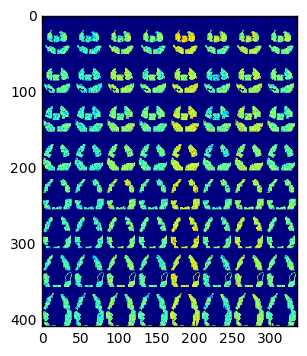

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(train_img[1,:,:])
print train_img.shape[2]

In [6]:
STRIP_HEIGHT = train_img.shape[1]
STRIP_WIDTH = train_img.shape[2]

In [7]:
np.random.seed(0)
# shuffle = np.random.permutation(database.shape[0])

# test = database[shuffle[0:100],:]
# val = database[shuffle[100:200],:]
# train = database[shuffle[200:],:]

xtrain = np.reshape(train_img, (train_img.shape[0], train_img.shape[1], train_img.shape[2], 1))
ytrain = train_lbl

xval = np.reshape(val_img, (val_img.shape[0], val_img.shape[1], val_img.shape[2], 1))
yval = val_lbl

### Model ###                                                                                                                               
model = Sequential()
mde = 0                                                                                                                                                                      
k_init = 'he_normal'
ridge = 0.0001

model.add(Convolution2D(conv1_filter, kernel_size=(3, 3), strides=(1, 1),
                        padding='same', data_format="channels_last", activation=None, use_bias=True,
                        kernel_regularizer=l2(ridge),
                        kernel_initializer=k_init, bias_initializer='zeros', input_shape=(STRIP_HEIGHT, STRIP_WIDTH, CHANNELS)))                                                                                                   
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(conv2_filter, kernel_size=(5, 5), strides=(1, 1),
                        padding='same', data_format="channels_last", activation=None, use_bias=True,
                        kernel_regularizer=l2(ridge),
                        kernel_initializer=k_init, bias_initializer='zeros'))                                                                                                   
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2, 2), strides=(2, 2), padding='valid'))

model.add(Convolution2D(conv3_filter, kernel_size=(7, 7), strides=(1, 1),
                        padding='same', data_format="channels_last", activation=None, use_bias=True,
                        kernel_regularizer=l2(ridge),
                        kernel_initializer=k_init, bias_initializer='zeros'))                                                                                                   
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(conv4_filter, kernel_size=(9, 9), strides=(1, 1),
                        padding='same', data_format="channels_last", activation=None, use_bias=True,
                        kernel_regularizer=l2(ridge),
                        kernel_initializer=k_init, bias_initializer='zeros'))                                                                                                   
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(1024, kernel_initializer=k_init,kernel_regularizer=l2(ridge)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(512, kernel_initializer=k_init,kernel_regularizer=l2(ridge)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256, kernel_initializer=k_init,kernel_regularizer=l2(ridge)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(CLASSES, kernel_initializer=k_init,kernel_regularizer=l2(ridge)))
# model.add(BatchNormalization())
model.add(Activation('softmax'))

Lr = 1e-4 
dcy = 1e-5                                                                                                                                                                                
m = 0.5
batch_sz = 20
# sgd = SGD(lr=Lr, momentum=m, decay=dcy,  nesterov=True)
adam = Adam(lr=Lr, decay=dcy)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()
print('learning rate: %f, decay: %f' %(Lr, dcy))

from keras.backend import get_session
get_session().run(tf.global_variables_initializer())
a = model.fit(xtrain, ytrain, batch_size = batch_sz, epochs= 10, verbose = 1)

loss_and_metrics = model.evaluate(xval, yval, batch_size=batch_sz)

print "Loss and accuracy: ", loss_and_metrics

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 408, 336, 4)       40        
_________________________________________________________________
batch_normalization_1 (Batch (None, 408, 336, 4)       16        
_________________________________________________________________
activation_1 (Activation)    (None, 408, 336, 4)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 408, 336, 8)       808       
_________________________________________________________________
batch_normalization_2 (Batch (None, 408, 336, 8)       32        
_________________________________________________________________
activation_2 (Activation)    (None, 408, 336, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 204, 168, 8)       0         
__________

In [8]:
y_pred = model.predict(xval, batch_size=128)
y_pred = np.argmax(y_pred, axis=1)

In [9]:
y_true = np.argmax(yval, axis=1)

In [20]:
import sklearn as sk

print "Precision", sk.metrics.precision_score(y_true, y_pred)
print "Recall", sk.metrics.recall_score(y_true, y_pred)
print "f1_score", sk.metrics.f1_score(y_true, y_pred)
print "confusion_matrix"
print sk.metrics.confusion_matrix(y_true, y_pred, labels=[0, 1])
fpr, tpr, tresholds = sk.metrics.roc_curve(y_true, y_pred)
roc_auc = sk.metrics.auc(fpr, tpr)
print roc_auc

Precision 0.658536585366
Recall 0.9
f1_score 0.760563380282
confusion_matrix
[[16 14]
 [ 3 27]]
0.716666666667
